# EXERCISE 1

### Q1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

- preg = Number of times pregnant
- plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- pres = Diastolic blood pressure (mm Hg)
- skin = Triceps skin fold thickness (mm)
- test = 2-Hour serum insulin (mu U/ml)
- mass = Body mass index (weight in kg/(height in m)^2)
- pedi = Diabetes pedigree function
- age = Age (years)
- class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

### Q2 Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [31]:
df=pd.read_csv("pima-indians-diabetes.csv")
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [32]:
df["age"].mean()

33.21903520208605

In [33]:
df["age"].std()

11.752295597433893

In [34]:
df["age"].min()

21

In [35]:
df["age"].max()

81

In [36]:
num=11
bins = np.linspace(21, 81, num=11)
df_b = pd.DataFrame(pd.cut(df['age'], bins=bins).value_counts()).sort_index(ascending = True)
df_b

,age
"(21.0, 27.0]",269
"(27.0, 33.0]",142
"(33.0, 39.0]",87
"(39.0, 45.0]",89
"(45.0, 51.0]",44
"(51.0, 57.0]",31
"(57.0, 63.0]",25
"(63.0, 69.0]",14
"(69.0, 75.0]",2
"(75.0, 81.0]",1


C:\anaconda\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


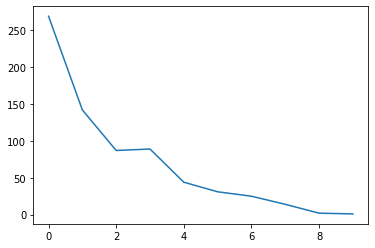

In [37]:
plt.plot(df_b)

### Q3 Analyze and tabulate the relationship of age, BMI of patients with respect to the class

In [38]:
pd.crosstab(df['class'],[df["age"],df["mass"]])

age     21                                               ...   66   67       \
mass  0.0  18.2 19.1 21.0 21.8 22.1 22.5 22.6 23.0 23.2  ... 35.5 21.7 26.1   
class                                                    ...                  
0        3    2    1    1    2    1    1    2    1    1  ...    0    1    1   
1        0    0    0    0    0    0    0    0    0    0  ...    1    0    0   

age          68   69        70   72   81  
mass  38.5 35.6 0.0  26.8 32.5 19.6 25.9  
class                                     
0        0    1    1    1    0    1    1  
1        1    0    0    0    1    0    0  

[2 rows x 707 columns]

### Q4 Tabulate the class label and comment on whether the classes are balanced

In [39]:
df["class"].value_counts()

0    500
1    267
Name: class, dtype: int64

The classes are unbalanced

### Q5 Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score

In [41]:
x = df.drop(['class'], axis = 1)
y = df['class']

In [42]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       [0.05882353, 0.44723618, 0.54098361, ..., 0.41877794, 0.03800171,
        0.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Q6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [44]:
LogReg = LogisticRegression(random_state = 38)

In [45]:
LogReg.fit(X_train, y_train)

LogisticRegression(random_state=38)

In [46]:
y_pred = LogReg.predict(X_test)

In [47]:
score = LogReg.score(X_train,y_train)
score

0.7742537313432836

In [48]:
f1_score(y_pred, y_test)

0.6405228758169935

<AxesSubplot:>

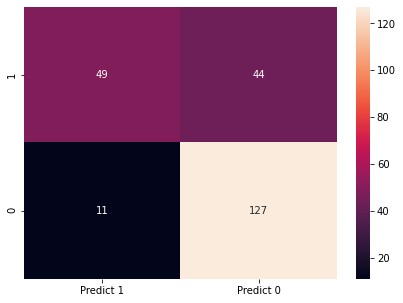

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### Q7 Compute accuracy rate, true positive and true negative rate and comment on the performance.

- Accuracy is 76.19%
- True Positive=49
- True Negative=127

### Q8.Visualize the ROC curve, and comment on the performance of the classifier.

In [63]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score
figure=roc_curve(y_test, y_pred,pos_label=None, sample_weight=None, drop_intermediate=True)
figure

(array([0.        , 0.07971014, 1.        ]),
 array([0.        , 0.52688172, 1.        ]),
 array([2, 1, 0], dtype=int64))